### Data Wrangling and Exploration for Stroke Prediction Dataset from Kaggle:
### https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

### Import Packages:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load Data:

In [4]:
Stroke = pd.read_csv('C:/Users/Mia/OneDrive/Documents/GitHub/Final_Project/Datasets/kaggle-stroke.csv')

In [8]:
Stroke.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

### Recoding Categorical data to Numeric:
#### First look to see how many levels there are to do a proper recode:

In [9]:
np.unique(Stroke['Residence_type'])

array(['Rural', 'Urban'], dtype=object)

In [10]:
def Residence_type (series):
    if series == "Rural":
        return 0
    if series == "Urban":
        return 1
Stroke['Residence_typeR'] = Stroke['Residence_type'].apply(Residence_type)

In [11]:
Stroke.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  Residence_typeR  
0       1                1  
1       1                0  
2       1                0  
3       1                1  
4       1                0

In [12]:
(Stroke['gender']).value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

#### I removed the "Other" value as there is only one row out of 5110 rows who did not select male or female 


In [15]:
Stroke[Stroke.gender == 'Other'].head()

id gender   age  hypertension  heart_disease ever_married work_type  \
3116  56156  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  \
3116          Rural             143.33  22.4  formerly smoked       0   

      Residence_typeR  
3116                0

In [16]:
Stroke.drop(labels=[3116], axis=0, inplace=True)

#### This dropped index number 3116 and gave us just the Female and Male responses to be recoded:

In [17]:
Stroke.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [18]:
def Gender (series):
    if series == "Male":
        return 1
    if series == "Female":
        return 2
Stroke['genderR'] = Stroke['gender'].apply(Gender)
    

In [19]:
Stroke.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  Residence_typeR  genderR  
0       1                1        1  
1       1                0        2  
2       1                0        1  
3       1                1        2  
4       1                0        2

<AxesSubplot:>

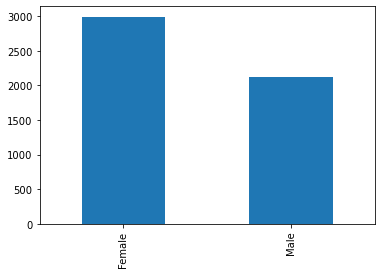

In [20]:
Stroke['gender'].value_counts().plot.bar()

### I did a quick plot that shows there are more females in this study than males

#### Continuing with Recoding Categorical Variables, ever_married:

In [21]:
np.unique(Stroke['ever_married'])

array(['No', 'Yes'], dtype=object)

In [22]:
def Ever_Married (series):
    if series == "Yes":
        return 1
    if series == "No":
        return 0

Stroke['ever_marriedR'] = Stroke['ever_married'].apply(Ever_Married)

In [23]:
Stroke.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  Residence_typeR  genderR  ever_marriedR  
0       1                1        1              1  
1       1                0        2              1  
2       1                0        1              1  
3       1                1        2              1  
4       1                0        2              1

#### Recoding work_type:

In [24]:
np.unique(Stroke['work_type'])

array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
      dtype=object)

In [25]:
def Work_type (series):
    if series == "Govt_job":
        return 1
    if series == "Never_worked":
        return 2
    if series == "Private":
        return 3
    if series == "Self-employed":
        return 4
    if series == "children":
        return 5

Stroke['work_typeR'] = Stroke['work_type'].apply(Work_type)

In [26]:
Stroke.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  Residence_typeR  genderR  ever_marriedR  work_typeR  
0       1                1        1              1           3  
1       1                0        2              1           4  
2       1                0        1              1           3  
3       1                1        2              1           3  
4       1                0        2              1           4

#### Looking at NaN values in BMI:

In [27]:
np.unique(Stroke['bmi'])

array([10.3, 11.3, 11.5, 12. , 12.3, 12.8, 13. , 13.2, 13.3, 13.4, 13.5,
       13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.8,
       14.9, 15. , 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9,
       16. , 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17. ,
       17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18. , 18.1,
       18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. , 19.1, 19.2,
       19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1, 20.2, 20.3,
       20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1, 21.2, 21.3, 21.4,
       21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3, 22.4, 22.5,
       22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4, 23.5, 23.6,
       23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7,
       24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8,
       25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9,
       27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27

#### Dropping the NaN values from the bmi column:

In [28]:
Stroke.dropna(inplace=True)

In [29]:
Stroke.tail()

id  gender   age  hypertension  heart_disease ever_married  \
5104  14180  Female  13.0             0              0           No   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5104       children          Rural             103.08  18.6          Unknown   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  Residence_typeR  genderR  ever_marriedR  work_typeR  
5104       0                0        2              0           5  
5106       0                1        2              1           4  
5107       0                0        2              1           4  
5108       0                0        1              1           3  
5109       0                1        2              1           1

#### Recoding smoking_status column:

In [30]:
Stroke.smoking_status.value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [32]:
def Smoking_status (series):
    if series == "never smoked":
        return 0
    if series == "Unknown":
        return 1
    if series == "formerly smoked":
        return 2
    if series == "smokes":
        return 3
    
Stroke['smoking_statusR'] = Stroke['smoking_status'].apply(Smoking_status)

In [33]:
Stroke.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   

   stroke  Residence_typeR  genderR  ever_marriedR  work_typeR  \
0       1                1        1              1           3   
2       1                0        1              1           3   
3       1                1        2              1           3   
4       1                0        2              1           4   
5       1                1        1              1           3   

   smoking_statusR  
0                2  
2                0  
3                3  
4                0  
5                2

### Creating a new dataframe with the recoded data columns:

In [34]:
Stroke2 = Stroke[['id', 'genderR', 'age', 'hypertension', 'heart_disease', 'ever_marriedR', 'work_typeR', 'Residence_typeR', 'avg_glucose_level', 'bmi', 'smoking_statusR', 'stroke']]

In [35]:
Stroke2.head()

id  genderR   age  hypertension  heart_disease  ever_marriedR  \
0   9046        1  67.0             0              1              1   
2  31112        1  80.0             0              1              1   
3  60182        2  49.0             0              0              1   
4   1665        2  79.0             1              0              1   
5  56669        1  81.0             0              0              1   

   work_typeR  Residence_typeR  avg_glucose_level   bmi  smoking_statusR  \
0           3                1             228.69  36.6                2   
2           3                0             105.92  32.5                0   
3           3                1             171.23  34.4                3   
4           4                0             174.12  24.0                0   
5           3                1             186.21  29.0                2   

   stroke  
0       1  
2       1  
3       1  
4       1  
5       1

### Correlation Matrix

In [36]:
Stroke2.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

### Heat Map

<AxesSubplot:>

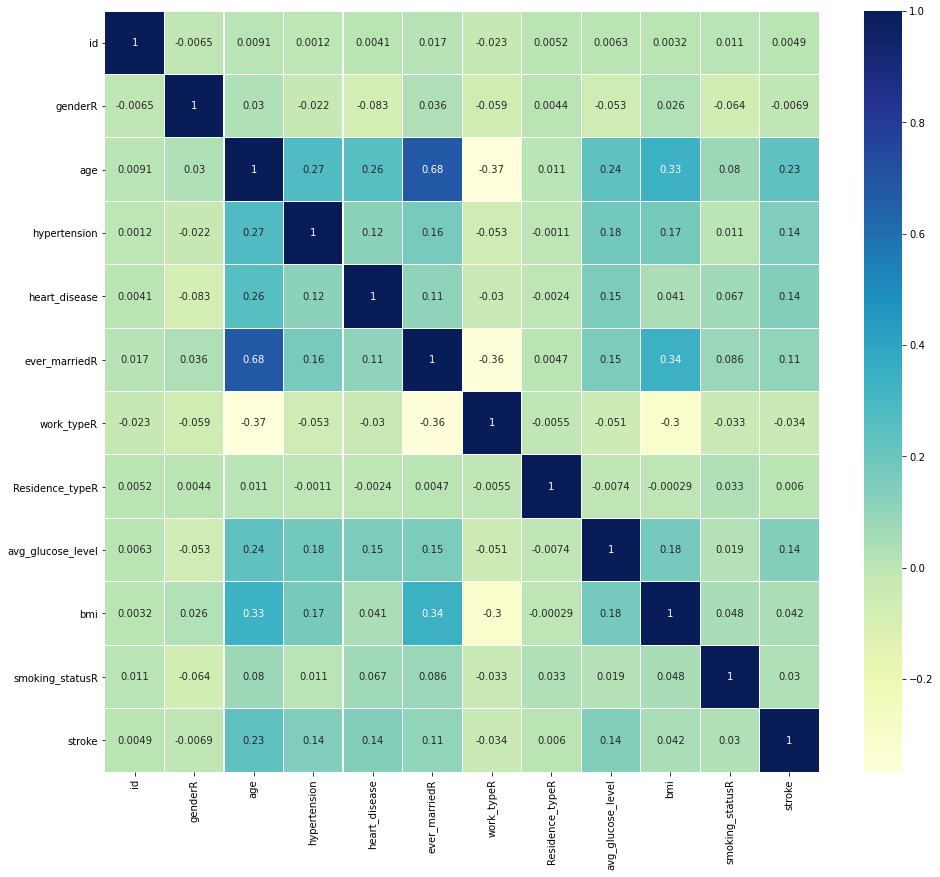

In [37]:
plt.figure(figsize=(16,14))
sns.heatmap(Stroke2.corr(), cmap ="YlGnBu",linewidths = .1, annot = True)

#### This doesn't look too exciting but we are going to do some other things with it, alot of the variables were recoded categorical variables 

### Looking at a Pairplot

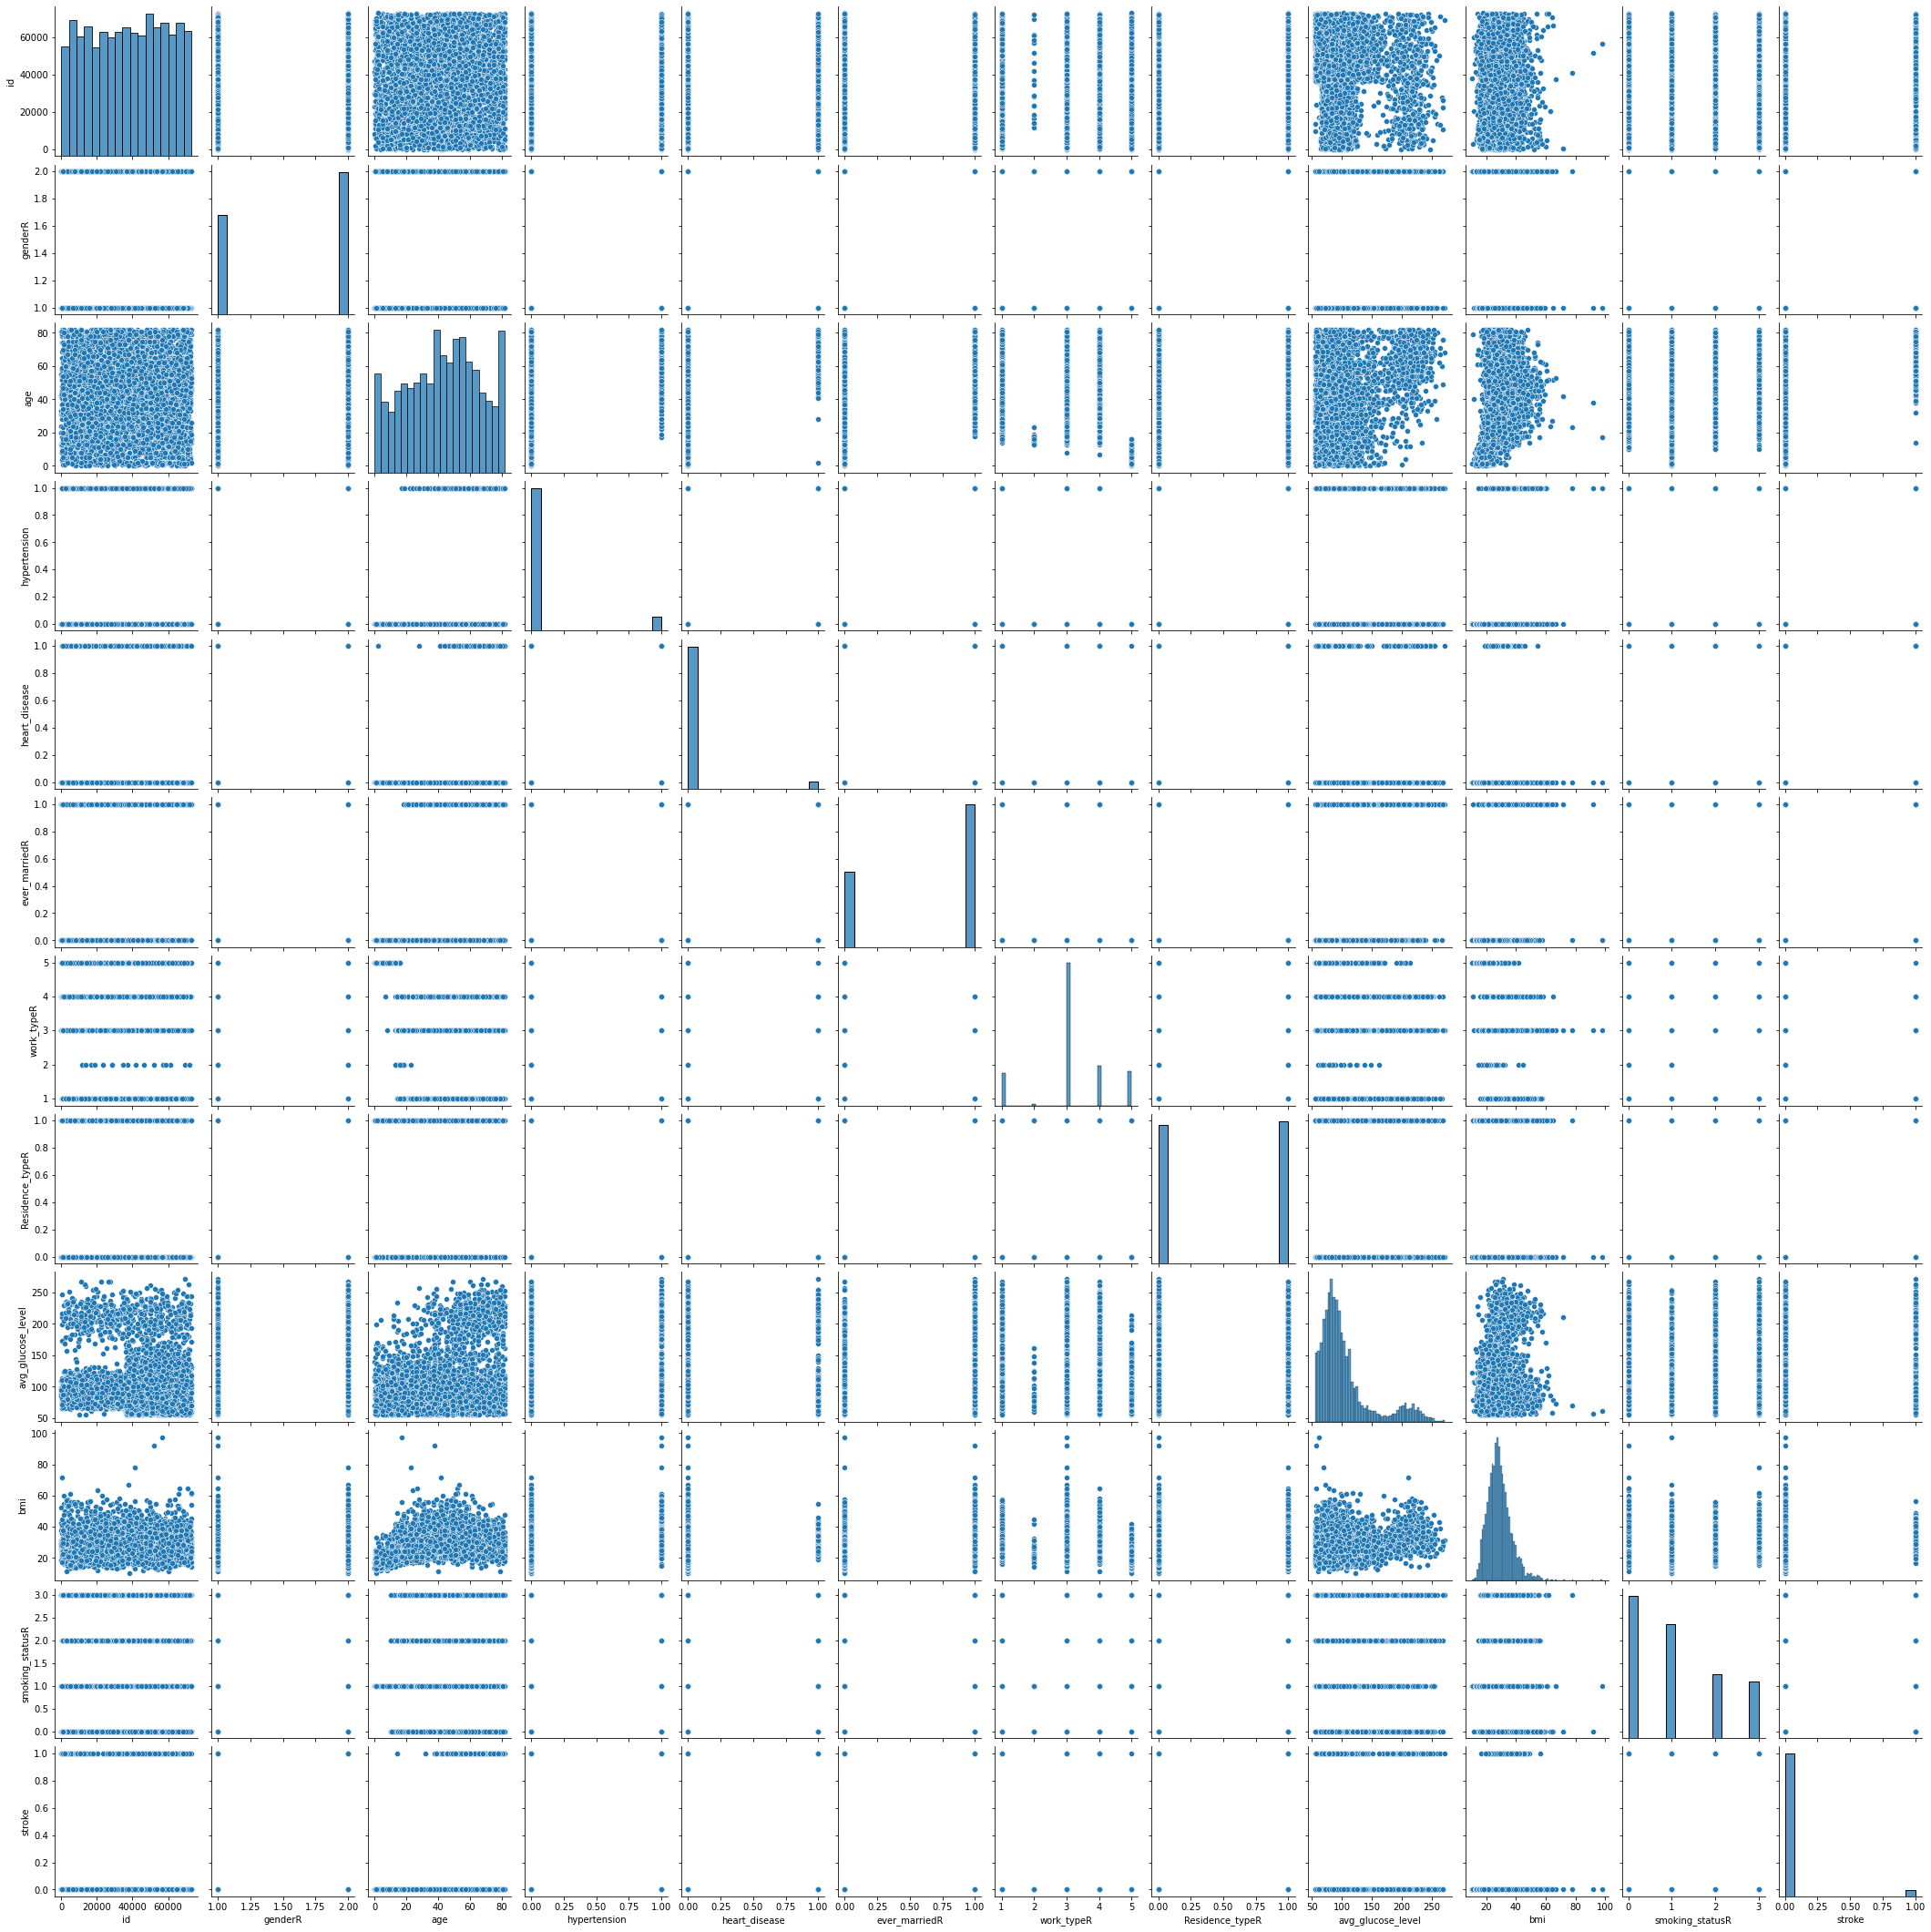

In [38]:
sns.pairplot(Stroke2)

### Histograms
#### Importing packages (I know this is not technically part of DW but I want to look at them)

In [39]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Histogram of Smoker Status

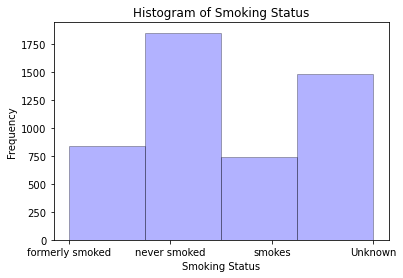

In [50]:
num_bins = 4
n, bins, patches = plt.hist(Stroke['smoking_status'], num_bins, facecolor='blue', alpha=.3, ec='black')
plt.xlabel('Smoking Status')
plt.ylabel('Frequency')
plt.title('Histogram of Smoking Status')
plt.show()

#### This shows the majority of the people in the study did not smoke, but there is also a large amount of people with an unknown smoking status


### Just Curious to Look at a Scatterplot of BMI and Glucose levels

In [51]:
Plot = Stroke.plot.scatter(x='bmi', y='avg_glucose_level')
Plot.set_title("BMI and Average Glucose Level")
Plot.set_xlabel("BMI")
Plot.set_ylabel("Average Glucose Level")

Text(0, 0.5, 'Average Glucose Level')

#### Not really showing much of a correlation

In [53]:
Stroke2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   genderR            4908 non-null   int64  
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_marriedR      4908 non-null   int64  
 6   work_typeR         4908 non-null   int64  
 7   Residence_typeR    4908 non-null   int64  
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_statusR    4908 non-null   int64  
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 498.5 KB


#### Importing Packages to Explore Decision Trees and Random Forest

In [2]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


#### Joe or Silvia, can you let me know, was the steps I did in this next code necessary? To convert to integer?

In [40]:
Stroke2.age=Stroke2.age.astype(int)

C:\Users\Mia\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [41]:
Stroke2.avg_glucose_level=Stroke2.avg_glucose_level.astype(int)

In [42]:
Stroke2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   genderR            4908 non-null   int64  
 2   age                4908 non-null   int32  
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_marriedR      4908 non-null   int64  
 6   work_typeR         4908 non-null   int64  
 7   Residence_typeR    4908 non-null   int64  
 8   avg_glucose_level  4908 non-null   int32  
 9   bmi                4908 non-null   float64
 10  smoking_statusR    4908 non-null   int64  
 11  stroke             4908 non-null   int64  
dtypes: float64(1), int32(2), int64(9)
memory usage: 460.1 KB


In [43]:
Stroke2.bmi=Stroke2.bmi.astype(int)

In [44]:
Stroke2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 4908 non-null   int64
 1   genderR            4908 non-null   int64
 2   age                4908 non-null   int32
 3   hypertension       4908 non-null   int64
 4   heart_disease      4908 non-null   int64
 5   ever_marriedR      4908 non-null   int64
 6   work_typeR         4908 non-null   int64
 7   Residence_typeR    4908 non-null   int64
 8   avg_glucose_level  4908 non-null   int32
 9   bmi                4908 non-null   int32
 10  smoking_statusR    4908 non-null   int64
 11  stroke             4908 non-null   int64
dtypes: int32(3), int64(9)
memory usage: 441.0 KB


#### Now above we see all the variables have been converted to integer. (Just let me know if that is necessary, I remember doing it, just want to check)

#### Preparing for Decision Trees / Random Forest: Codes used below are sited from DSO106 Machine Learning Lesson 3

#### Data Wrangling: I am removing the id column to not effect the results, and stroke column since that will be our "y"

In [45]:
x = Stroke2.drop(['stroke', 'id'], axis=1)
y = Stroke2['stroke']

#### Train Test Split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

#### Creating an Initial Decision Tree

In [47]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

#### Assessing the Model and Reading the Confusion Matrix

In [48]:
treePredictions = decisionTree.predict(x_test)

In [49]:
print(confusion_matrix(y_test, treePredictions))

[[1340   60]
 [  65    8]]


#### In the above confusion matrix, the model accurately predicted values 1340 and 8, while 65 values were falsely predicted and 60 values were false positives meaning they were actually there but not supposed to be. 

### Evaluating how Fit the Model is

In [50]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1400
           1       0.12      0.11      0.11        73

    accuracy                           0.92      1473
   macro avg       0.54      0.53      0.53      1473
weighted avg       0.91      0.92      0.91      1473



#### This shows that the model was 95% accurate in not predicting stroke, yet only 12% accurate in predicting a stroke. Overall, the model is 91% accurate.

#### Continuing to Random Forest

In [51]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

#### Evaluate Fit of the Model

In [52]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[1399    1]
 [  73    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1400
           1       0.00      0.00      0.00        73

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.90      0.95      0.93      1473



#### This model shows 95% accuracy in not predicting stroke, yet a disappointing 0% accuracy in predicting stroke. Overall, the model accuracy is 90%.

### Hyperparameter Tuning and Number of Estimators

#### Looking at the number of estimators (Code from DSO106 Lesson 3 page 7)

In [53]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.9035980991174474
4 : 0.9456890699253224
5 : 0.9395790902919212
8 : 0.9477257298031229
10 : 0.9477257298031229
20 : 0.9477257298031229
50 : 0.9477257298031229
75 : 0.9484046164290564
100 : 0.9484046164290564
250 : 0.9497623896809233
500 : 0.9497623896809233


#### We can see here that our number of estimators will be 5, below here is a plot as well:

In [54]:
plt.plot(n_estimators_array, results)

#### Below we are creating lists with all the hyperparameter values we want to try out

In [55]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)
#### THIS CODE IS FROM P7 L3 DSO106

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


#### Now we are going to create the random forest with the number of estimators we saw from the results above

In [57]:
rf = RandomForestClassifier(n_estimators=5)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=5),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

#### Now we will look for the best parameters possible for the model

In [58]:
rf_random.best_params_

{'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 40}

#### I am going to use those parameters in this code for the optimal results for the model

In [59]:
forest = RandomForestClassifier(n_estimators=5, min_samples_leaf=4, max_features="auto", max_depth=40)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=40, min_samples_leaf=4, n_estimators=5)

#### Looking at the classification report

In [60]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[1396    4]
 [  73    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1400
           1       0.00      0.00      0.00        73

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.90      0.95      0.92      1473



#### We see a few things here, the model still has an overalll accuracy rate of 90%. Yet it is still 0% accurate at predicting stroke, but 95% accurate on not predicting stroke. The confusion matrix shows 1396 values accurately predicted, while 73 values were inaccurately predicted and 4 values were actually present yet not supposed to be.

#### Feature Importance sorted

In [63]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

age                  0.344978
avg_glucose_level    0.261019
bmi                  0.170161
work_typeR           0.053385
smoking_statusR      0.046762
heart_disease        0.036572
Residence_typeR      0.030078
genderR              0.029483
ever_marriedR        0.013784
hypertension         0.013779
dtype: float64


#### Plotting Feature Importance

In [64]:
feature_importances.plot(kind='barh', figsize=(7,6))

<AxesSubplot:>

#### After sorting the variables, the results show that age was the most significant factor in predicting stroke, followed by average glucose level, and bmi. I would love to look for more data to see if this tends to be a similar trend in determining significant influences on strokes. I am also surprised that heart disease and hypertension don't have more significant influences on stroke looking at this result.

###### I am not a medical doctor, these are just my thoughts on the data results. If you are concerned about your risk of stroke, please speak to a licensed medical professional.-MP